In [41]:
import matplotlib.pyplot as plt
from IPython.display import Latex
from ipywidgets import interactive, interact, fixed
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [42]:
from scipy.integrate import odeint, ode
from scipy import sqrt, linspace, cos, sin, pi, arctan,arcsin,exp,conjugate
from scipy.optimize import root
from numpy import rad2deg, square,array

In [52]:
def fresnel(ni=1.,nt=1.4):
    ti=linspace(0,pi/2,100);
    cos_t=sqrt(1.-(square(ni/nt*sin(ti))));
    rs=(ni*cos(ti)-nt*cos_t)/(ni*cos(ti)+nt*cos_t);
    rp=(ni*cos_t-nt*cos(ti))/(ni*cos_t+nt*cos(ti))
    ts=(2*ni*cos(ti))/(ni*cos(ti)+nt*cos_t);
    tp=(2*ni*cos(ti))/(ni*cos_t+nt*cos(ti));

    return (rs,ts,rp,tp)

In [53]:
n0=1
n1=1.38
n2=1.5
ti=linspace(0,pi/2,100)

In [54]:
rs01,ts01,rp01,tp01 = fresnel(n0,n1)
rs12,ts12,rp12,tp12 = fresnel(n1,n2)
rs10,ts10,rp10,tp10 = fresnel(n1,n0)
rs21,ts21,rp21,tp21 = fresnel(n2,n1)
theta1=arcsin(n0/n1*sin(ti))

In [55]:
def RTotal (kd):
    rs01,ts01,rp01,tp01 = fresnel(n0,n1)
    rs12,ts12,rp12,tp12 = fresnel(n1,n2)
    rs10,ts10,rp10,tp10 = fresnel(n1,n0)
    rs21,ts21,rp21,tp21 = fresnel(n2,n1)
    theta1=arcsin(n0/n1*sin(ti))
    
    rstot=rs01+(ts01*exp(2.j*kd*cos(theta1))*rs12*ts10)/(1-rs10*rs12*exp(2.j*kd*cos(theta1)))
    
    RS=rstot*conjugate(rstot)
    TS=1.-RS
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    #fore doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
    
    
    # Make the new figure with new formatting
    fig, axes = plt.subplots(1,2)

    axes[0].plot(rad2deg(ti), RS, label ='Rs')
    axes[0].plot(rad2deg(ti),TS, label= 'Ts')
    axes[1].plot(rad2deg(ti), RP, label='Rp')
    axes[1].plot(rad2deg(ti),RS,label='Tp')
  
    axes[0].legend()
    axes[1].legend()
    
   

    plt.rcParams.update(rcdef)       
    plt.rcParams.update(rcdef)
  

NameError: global name 'RP' is not defined

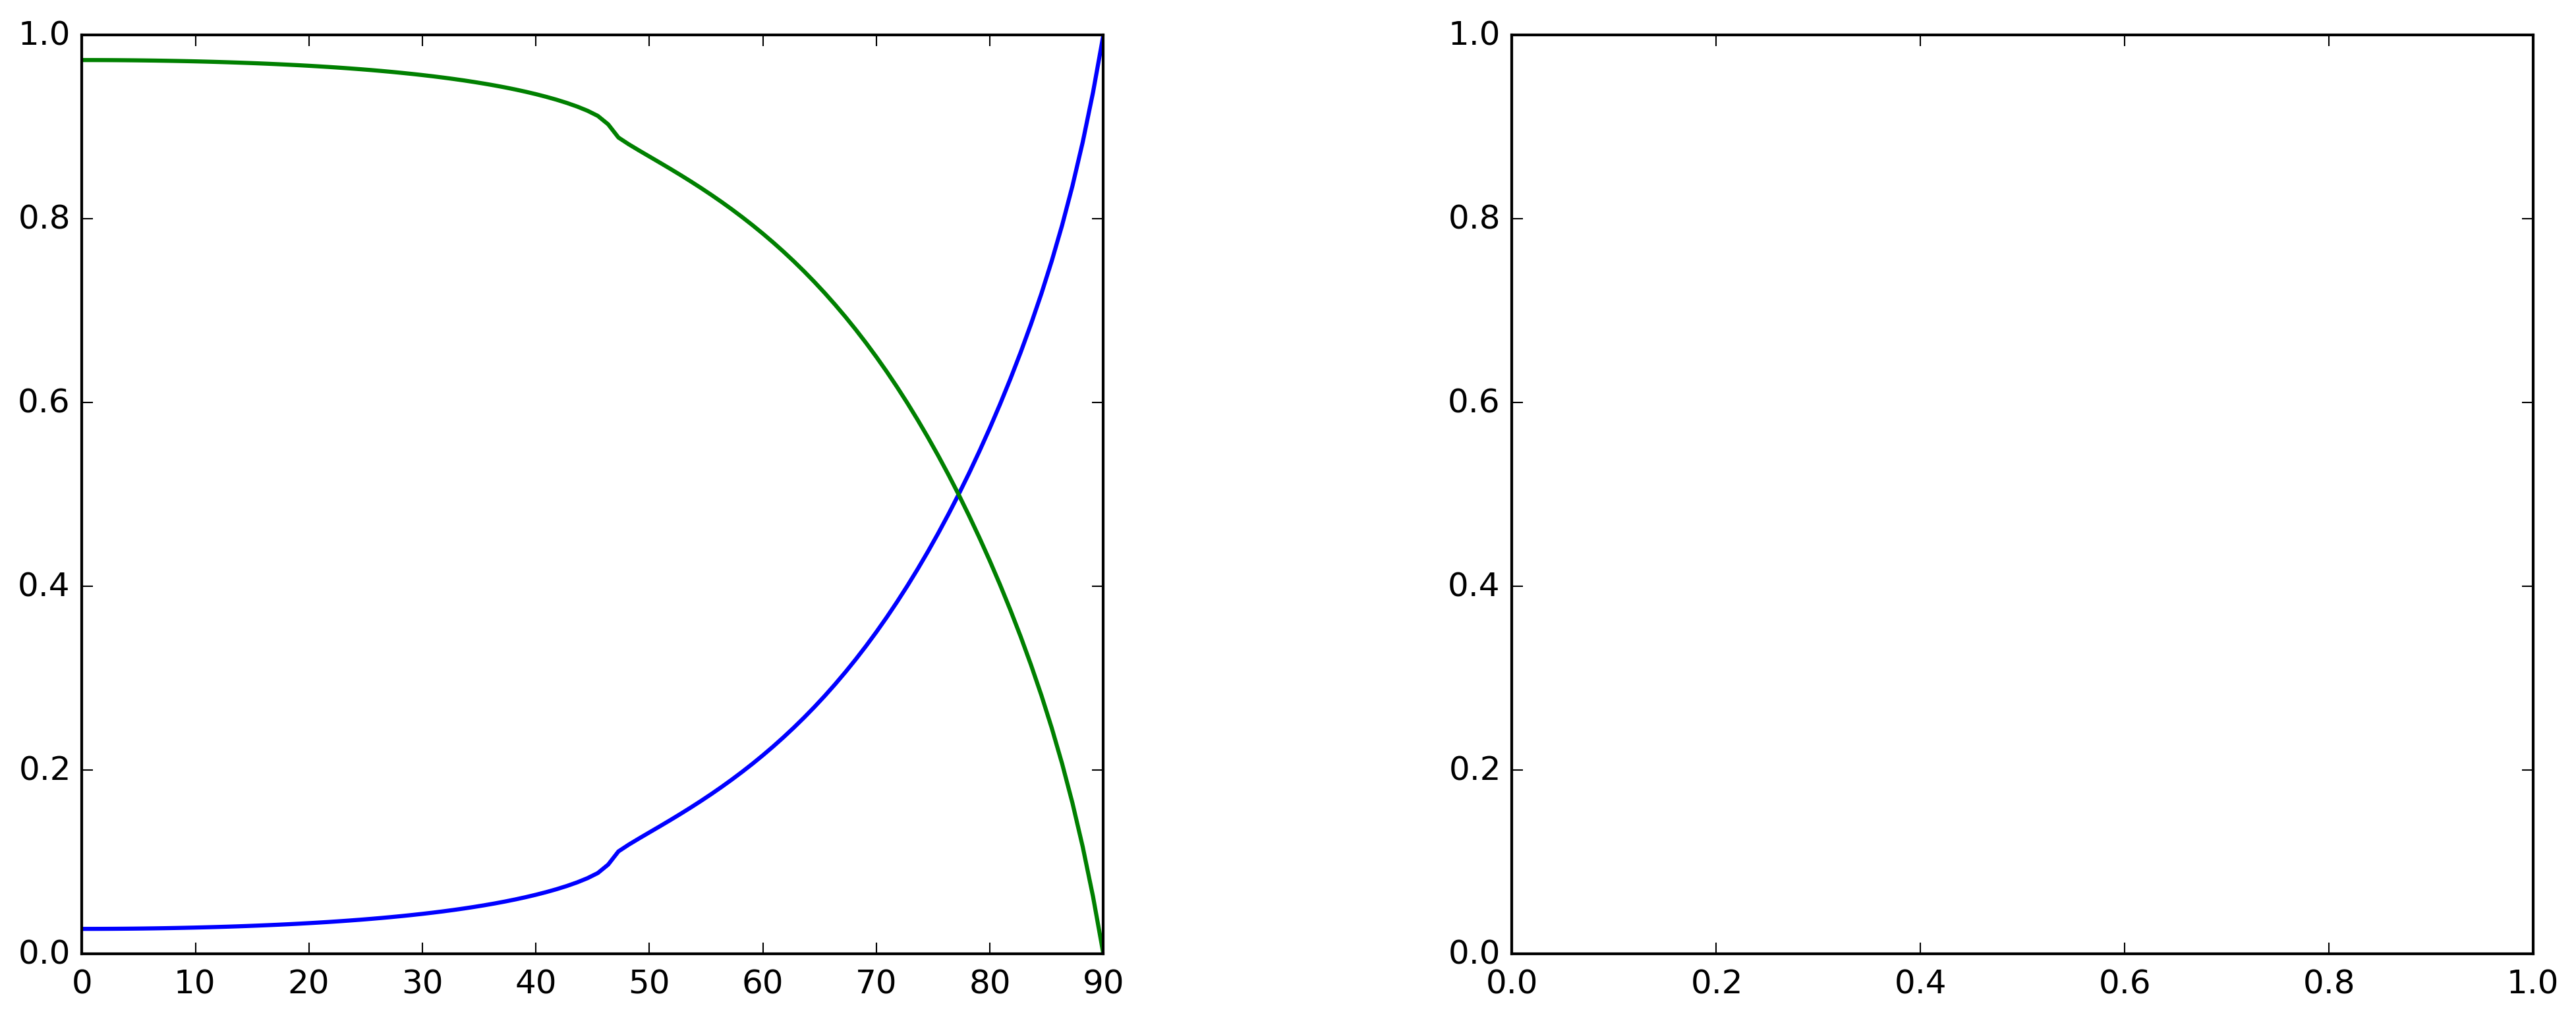

In [57]:
RTotal(pi/4)